# Teste de medie

In [23]:
import numpy as np
from scipy.stats import t, chi2
import matplotlib.pyplot as plt

Urmatoarele date reprezinta rezultate raportate de doi algoritmi de optimizare pe un set de 10 functii de test.

Presupunand ca populatiile sunt normal distribuite sa se verifice daca diferentele dintre rezultate sunt semnificative ($\alpha=0.05$)

In [10]:
A1=np.array([0.1,0.05, 0.2, 0.001, 0.7, 0.3, 0.05, 0.8, 0.6, 0.08])
A2=np.array([0.15, 0.03, 0.3, 0.002, 0.75, 0.1, 0.01, 0.75, 0.7, 0.03])

In [11]:
A1, A2

(array([0.1  , 0.05 , 0.2  , 0.001, 0.7  , 0.3  , 0.05 , 0.8  , 0.6  ,
        0.08 ]),
 array([0.15 , 0.03 , 0.3  , 0.002, 0.75 , 0.1  , 0.01 , 0.75 , 0.7  ,
        0.03 ]))

p1) $H_0: \mu_d=0$ $H_a: \mu_d \neq 0$

p2) statistica $t$

In [4]:
# p3) nivelul de semnificatie
alfa=0.05

In [6]:
# p4) regula de decizie
n=10
df=n-1
t_alfa_2 = t.ppf(alfa/2, df)
t_alfa_2

-2.262157162740992

In [7]:
def regula_bilateral(t, t_alfa_2):
    if (t<t_alfa_2) | (t>-t_alfa_2):
        return "Se respinge H_0"
    else:
        return "NU se respinge H_0"

In [8]:
# p5) calcule

In [12]:
diferente = A1 - A2

In [13]:
diferente

array([-0.05 ,  0.02 , -0.1  , -0.001, -0.05 ,  0.2  ,  0.04 ,  0.05 ,
       -0.1  ,  0.05 ])

In [14]:
d_barat = np.mean(diferente)

In [15]:
d_barat

0.005900000000000007

In [16]:
s = np.std(diferente, ddof=1)

In [17]:
s

0.08922686441500302

In [18]:
eroare_standard = s/ np.sqrt(n)

In [19]:
eroare_standard

0.028216012002643696

In [20]:
tt = (d_barat -0)/eroare_standard
tt

0.2091011302180906

In [21]:
# p6) aplicare regula
regula_bilateral(tt, t_alfa_2)

'NU se respinge H_0'

In [ ]:
# p7) nu se poate afirma ca este diferenta semnificativa intre rezultate. 

# Teste de varianta

Pentru a verifica afirmatia unui manager ca varianta cantitatii de lichid imbuteliat in sticle de 1l este mai mica de **1cm$^3$** se ia un esantion de 25 de sticle si se masoara volumul de lichid. Se constata ca $s^2=0.6333$. Sprijina datele afirmatia managerului? (pp. ca populatia e normal distribuita).

P1) $H_0: \sigma^2 \ge 1$ , $H_a \sigma^2 <1$

P2) $\chi^2$

In [22]:
# p3) nivel de semnificatie
alfa = 0.05

In [24]:
# p4) regula de decizie
n=25
df=n-1

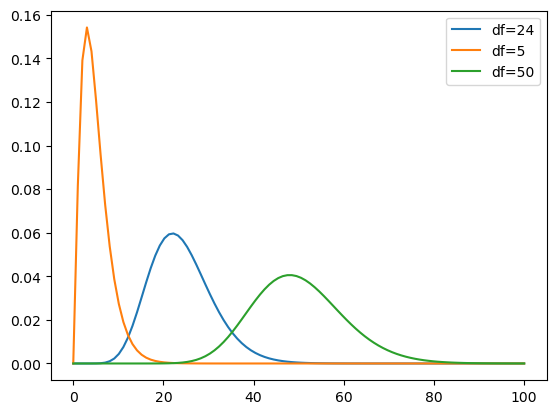

In [27]:
x = np.linspace(0, 100,100)
plt.plot(x, chi2.pdf(x,df), label=f'df={df}')
plt.plot(x, chi2.pdf(x,5), label=f'df=5')
plt.plot(x, chi2.pdf(x,50), label=f'df=50')
plt.legend()

In [28]:
chi2_alfa = chi2.ppf(alfa, df)
chi2_alfa

13.848425027170224

In [32]:
def regula_unilaterala_stanga(statistica, chi2_alfa):
    if statistica< chi2_alfa:
        return "Se respinge H_0"
    else:
        return "NU se respinge H_0"       

In [30]:
#p5) calcule
s2 = 0.6333
statistica = (n-1) * s2 /1
statistica

15.1992

In [33]:
#p6) verificare regula
regula_unilaterala_stanga(statistica, chi2_alfa)

'NU se respinge H_0'

In [ ]:
# p7) datele nu sprijina afirmatia managerului

# De rezolvat:

S-a ales un esantion aleator de 100 de observatii dintr-o populatie normal distribuita, cu $s^2=220$. Putem afirma la un nivel de semnificatie de 1% ca varianta populatiei este diferita de 300?

Varianta unui esantion de 50 de observatii dintr-o populatie normal distribuita este de $s^2=80$. Putem afirma cu 1% nivel de semnificatie ca $\sigma^2$ este mai mic de 100?